<h1 style="background-color:#8E0606;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px; color: white">What's your personality ?</h1>


<center><img src="https://64.media.tumblr.com/05a80d6f09d3f5fcbafe45da7abc640f/tumblr_nqep0jhYPM1soiiteo1_1280.png",height='20',width='50'></center>

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)

So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color:BLACK">Importing Libaris</h3>


In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Import Dataset and Basic Information of MBTI Dataset</h3>


In [5]:
# Importing Dataset

data = pd.read_csv("mbti.csv")

In [6]:
data.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


So, our data set looking like above, first columns for their personality and Second column are their Social Media Post's Collection.

In [7]:
data.shape

(8675, 2)

In [8]:
data.type.unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

We have total 8675 persons Social media Post.

In [9]:
data.columns

Index(['type', 'posts'], dtype='object')

Both column names are Type and Posts

In [10]:
data.isna().value_counts()

type   posts
False  False    8675
Name: count, dtype: int64

There are no Null Values in DataSet.

In [11]:
data.duplicated().value_counts()

False    8675
Name: count, dtype: int64

There are no duplicate columns also.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


Again its showing that, there are no NULL values as well as both columns datatype are Object.

In [13]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Data Distribution for each catagories</h3>


Text(0.5, 1.0, 'Distribution of total 16 type in data')

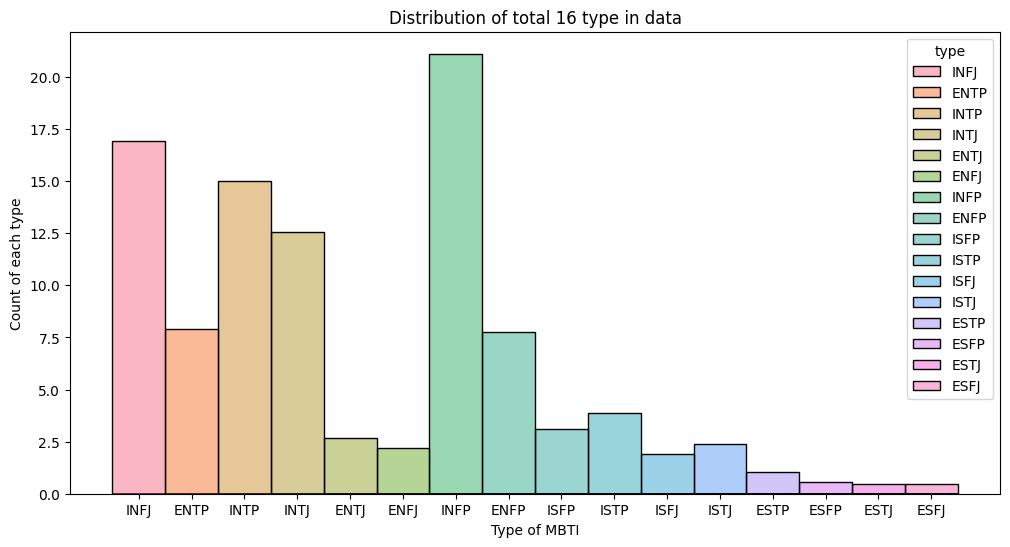

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(x='type', data=data, hue = "type", stat='percent', kde = True)
plt.xlabel("Type of MBTI")
plt.ylabel("Count of each type")
plt.title("Distribution of total 16 type in data")

Its, showing that there are 16 types of Personality types in type Column.

<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Data Pre-Processing</h3>


Looks into the data set properly:

In [15]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Remove Quotes</h4>

Initially if we notice, here every text is inside of a quote, remove them for other purpose of Pre-Processing

In [16]:
def remove_quote(text):
    return text[1:len(text)-1]

In [17]:
data["posts"] = data["posts"].apply(remove_quote)

In [18]:
data.head()

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...


Finally, The text are out of quote, this process is necessary for applying next text pre-processing concatination.

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Lowercasing</h4>


Lowercasing all of text

In [19]:
data["posts"] = data["posts"].str.lower()

In [20]:
data.head()

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...
1,ENTP,i'm finding the lack of me in these posts very...
2,INTP,good one _____ https://www.youtube.com/watc...
3,INTJ,"dear intp, i enjoyed our conversation the ot..."
4,ENTJ,you're fired.|||that's another silly misconcep...


All text are lowercase now.

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Contractions of Englisg Word</h4>


Concatenate all the short from used in text, into proper from.

In [21]:
# Dictionary for contractions of English text:

contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [22]:
def contraction_fun(text):
    new_text = []
    for w in text.split():
        if w in contractions:
            new_text.append(contractions[w])
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [23]:
data["posts"] = data["posts"].apply(contraction_fun)

In [24]:
data.sample(20)

,type,posts
5780,INTJ,itx92s hard for me to put this into words exac...
3810,INFJ,ell i have 17 ppl on fb & post almost daily bu...
3700,ENFP,my buddy is like that. never gets immersed int...
8005,INFP,i really like the way you put that. it makes a...
2814,INFJ,haikyuu karasuno hinata: esfp - he is your typ...
1056,INFJ,"another number highschool, mid teens. that is ..."
2720,ENTP,well...that all depends on the question: what ...
4377,INFJ,dear enfj boyfriend: i am so glad i said to yo...
3649,ISFP,you can read my obituary when it comes out. :w...
6351,INTP,"i fear that i am not an intp, that i am actual..."


So, Finally the text "i'm" become 'I am' and "you're" became 'you are' at index 1 and 4 respectively.

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Chat words to Normal Text</h4>


Removing Chat words is necessary to make it easier for your algorithm to understands the symentic meaning of your text data.

In [25]:
# Chat Words Dictionary

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [26]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [27]:
data["posts"] = data["posts"].apply(contraction_fun)

In [28]:
data.head()

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,good one _____ https://www.youtube.com/watch?v...
3,INTJ,"dear intp, i enjoyed our conversation the othe..."
4,ENTJ,you are fired.|||that's another silly misconce...


<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Remove URL's</h4>


Remove URL's is an important part whenever you are working with Social Media Posts

In [29]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [30]:
data["posts"] = data["posts"].apply(remove_url)

In [31]:
data.head()

,type,posts
0,INFJ,and intj moments sportscenter not top ten pl...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,"good one _____ course, to which i say i know;..."
3,INTJ,"dear intp, i enjoyed our conversation the othe..."
4,ENTJ,you are fired.|||that's another silly misconce...


Finally, We are able to remove all links from the DataSet

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Remove Punctuation</h4>


Remove punctuation from all text.

In [32]:
punc = string.punctuation

In [33]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def remove_punc(text):
    for char in punc:
        text = text.replace(char,' ')
    return text

In [35]:
data["posts"] = data["posts"].apply(remove_punc)

In [36]:
data.head()

,type,posts
0,INFJ,and intj moments sportscenter not top ten pl...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,good one course to which i say i know ...
3,INTJ,dear intp i enjoyed our conversation the othe...
4,ENTJ,you are fired that s another silly misconce...


Finally, We able to remove all punctuation from data set.

Task: By using TextBlob spelling Correction (Skip this one)

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Remove Stopwords </h4>


In [37]:
sttop_word = stopwords.words('english')

In [38]:
sttop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in sttop_word:
            new_text.append("")
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [40]:
data["posts"] = data["posts"].apply(remove_stopwords)

In [41]:
data.head()

,type,posts
0,INFJ,intj moments sportscenter top ten plays pran...
1,ENTP,finding lack posts alarming sex bori...
2,INTP,good one course say know blessing cur...
3,INTJ,dear intp enjoyed conversation day esoteri...
4,ENTJ,fired another silly misconception approac...


Finally, All stopwrds are removed from text data.

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Word Tokenization</h4>


Task: Word Tokenization

In [42]:
def word_tokenize(text):
    text = text.split()
    return text

In [43]:
data["posts"] = data["posts"].apply(word_tokenize)

In [44]:
data.head()

,type,posts
0,INFJ,"[intj, moments, sportscenter, top, ten, plays,..."
1,ENTP,"[finding, lack, posts, alarming, sex, boring, ..."
2,INTP,"[good, one, course, say, know, blessing, curse..."
3,INTJ,"[dear, intp, enjoyed, conversation, day, esote..."
4,ENTJ,"[fired, another, silly, misconception, approac..."


Task: Lemmatization

<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Distribution of each types data</h3>


In [45]:
 lemmatizer = WordNetLemmatizer()

In [46]:
def word_lemmatize(text):
    new_text = []
    for word in text:
        lem = lemmatizer.lemmatize(word,pos="v")
        new_text.append(lem)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [47]:
data["posts"] = data["posts"].apply(word_lemmatize)

In [48]:
data.head()

,type,posts
0,INFJ,intj moments sportscenter top ten play prank l...
1,ENTP,find lack post alarm sex bore position often e...
2,INTP,good one course say know bless curse absolutel...
3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,ENTJ,fire another silly misconception approach logi...


<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Word Cloud</h4>


In [49]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


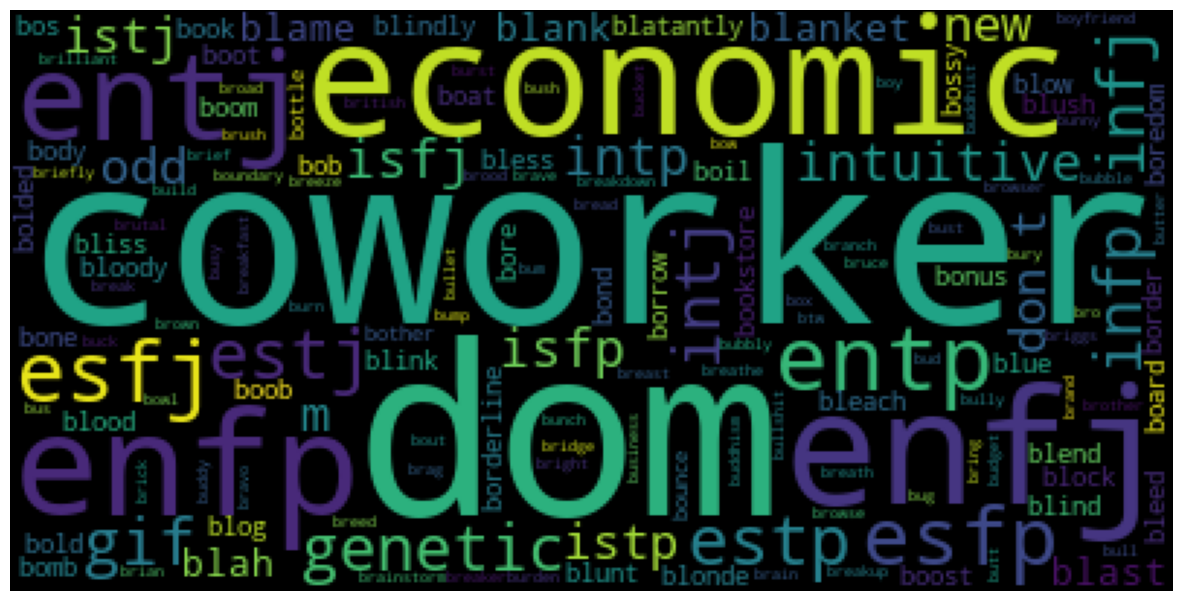

In [50]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer = Lemmatizer())
vectorizer.fit(data.posts)

feature_names=vectorizer.get_feature_names_out()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(15,12))
plt.axis('off')
plt.imshow(wc)

<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Applying Machine Learning Algorithm</h3>


<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Train- Test Split</h4>


In [51]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [52]:
train_data

,type,posts
8331,INFP,actually exactly expect laugh introversion 40 ...
1290,ISTP,nope ever busy work cause adrenaline rush acti...
1982,ENFJ,yes peace absence conflict infp friend suxx ha...
769,INFP,apologize delay response thank take time share...
8339,INFP,nightglow even imagine must struggle right dad...
...,...,...
4273,INFP,annoy sick negative associations uncontrolled ...
2698,INFP,dad tell love think first time life mean say d...
7435,ENTJ,date infjs include current partner 6 years pro...
1843,INTP,people unable replace social norms rational ef...


In [53]:
train_post = vectorizer.transform(train_data.posts).toarray()
test_post = vectorizer.transform(test_data.posts).toarray()

In [54]:
models_accuracy={}

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Label Encoding</h4>


In [55]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Model: Logistic Regression</h4>


In [56]:
model_log=LogisticRegression(max_iter=4000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=4000, n_jobs=-1)

In [57]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.16      0.27       152
        ENFP       0.81      0.66      0.72       540
        ENTJ       0.93      0.29      0.44       185
        ENTP       0.83      0.67      0.74       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.06      0.11        71
        INFJ       0.73      0.83      0.78      1176
        INFP       0.67      0.93      0.78      1466
        INTJ       0.74      0.81      0.77       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.89      0.25      0.39       133
        ISFP       0.86      0.25      0.39       217
        ISTJ       0.84      0.29      0.43       164
        ISTP       0.86      0.51      0.64       270

    accuracy                           0.72      

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [58]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.08      0.15        38
        ENFP       0.76      0.56      0.65       135
        ENTJ       0.78      0.15      0.25        46
        ENTP       0.67      0.49      0.57       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.63      0.71      0.67       294
        INFP       0.57      0.89      0.69       366
        INTJ       0.63      0.66      0.65       218
        INTP       0.66      0.83      0.73       261
        ISFJ       0.67      0.12      0.21        33
        ISFP       0.85      0.20      0.33        54
        ISTJ       0.50      0.05      0.09        41
        ISTP       0.68      0.45      0.54        67

    accuracy                           0.63      17

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [59]:
models_accuracy['logistic regression']= accuracy_score(test_target,model_log.predict(test_post))

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Model: Decession Tree Classifier</h4>


In [60]:
model_tree=DecisionTreeClassifier(max_depth=7)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=7)

In [61]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))


train classification report 
                precision    recall  f1-score   support

        ENFJ       0.50      0.01      0.01       152
        ENFP       0.60      0.69      0.64       540
        ENTJ       0.82      0.05      0.09       185
        ENTP       0.69      0.56      0.62       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.01      0.03        71
        INFJ       0.73      0.60      0.66      1176
        INFP       0.42      0.88      0.57      1466
        INTJ       0.66      0.59      0.62       873
        INTP       0.71      0.58      0.64      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.93      0.06      0.12       217
        ISTJ       0.75      0.02      0.04       164
        ISTP       0.72      0.49      0.58       270

    accuracy                           0.57      

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [62]:
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))


test classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.53      0.61      0.57       135
        ENTJ       1.00      0.02      0.04        46
        ENTP       0.50      0.45      0.47       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.66      0.57      0.61       294
        INFP       0.39      0.81      0.52       366
        INTJ       0.57      0.48      0.52       218
        INTP       0.69      0.53      0.60       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.43      0.06      0.10        54
        ISTJ       1.00      0.02      0.05        41
        ISTP       0.71      0.54      0.61        67

    accuracy                           0.51      1

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [63]:
models_accuracy['Decision Tree classifier'] = accuracy_score(test_target,model_tree.predict(test_post))

<h4 style="background-color:#FCCB06;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 40px;padding: 2px; color: white">Model: XGB Classifier</h4>


In [64]:
model_xgb = XGBClassifier(max_depth=5,n_estimators=50,learning_rate=0.1)

model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.99      0.93      0.96       152
        ENFP       0.95      0.90      0.92       540
        ENTJ       0.99      0.90      0.95       185
        ENTP       0.94      0.90      0.92       548
        ESFJ       1.00      0.88      0.94        33
        ESFP       1.00      0.87      0.93        38
        ESTJ       1.00      0.87      0.93        31
        ESTP       1.00      0.96      0.98        71
        INFJ       0.91      0.90      0.91      1176
        INFP       0.89      0.95      0.92      1466
        INTJ       0.92      0.92      0.92       873
        INTP       0.89      0.92      0.91      1043
        ISFJ       1.00      0.96      0.98       133
        ISFP       0.98      0.92      0.95       217
        ISTJ       0.98      0.95      0.96       164
        ISTP       0.97      0.96      0.96       270

    accuracy                           0.92      

c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [66]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

<h3 style="background-color:#B1DDF1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 40px;padding: 2px; color: BLACK">Accuracy Details of Machine Learning Models</h3>


In [67]:
models_accuracy

{'logistic regression': 0.6305475504322766,
 'Decision Tree classifier': 0.5129682997118156,
 'XGBoost Classifier': 0.6593659942363113}

In [68]:
models_accuracy.keys()

dict_keys(['logistic regression', 'Decision Tree classifier', 'XGBoost Classifier'])

In [69]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [70]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGBoost Classifier,0.659366
1,logistic regression,0.630548
2,Decision Tree classifier,0.512968
